# Homework 16

Each of the problems below should use Python `fsolve` to generate numerical solutions. Start by importing the needed modules, like was done in the lesson notes. Also, it goes without saying that all code you write should be adequately documented and plots should be well-formatted.

In [1]:
from all_imports import *

### Problem 1 (2 points) 

To find the power required to pump a fluid through a pipe we need a dimensionless quantity $f$ called the friction factor. The friction factor for turbulent flow in circular pipes can be found from the an empirical correlation called the Colebrook equation, 
$$\frac{1}{\sqrt{f}} = -2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{\mathrm{Re}\sqrt{f}}\right),$$
where $\mathrm{Re}$ is a dimensionless velocity called the Reynolds number and $\epsilon /D$ is the pipe roughness divided by the diameter (this ratio is also dimensionless). 

Make a smooth plot of $\mathrm{Re}$ vs. $f$ for $\epsilon /D=0.001$ and $10^3 \le \mathrm{Re} \le 10^8$. The horizontal axis for $\mathrm{Re}$ should be plotted logarithmically and $\mathrm{Re}$ should therefore be spaced logarithmically using the numpy logspace function. A semilog plot can be made from the command `plt.semilogx(x, y)` or `plt.semilogy(x, y)`

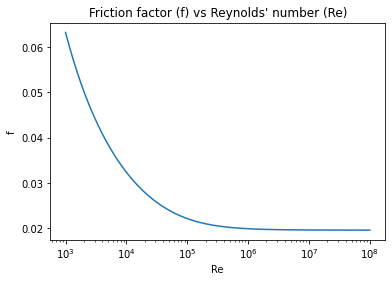

In [2]:
# set initial constants
Re = np.logspace(3, 8, 200)
ϵ_by_D = 0.001
k = 3.7, 2.51

# initialize and populate f values
f = np.zeros(200)
for i in range(len(f)):
    f[i] = fsolve(lambda f: 1/np.sqrt(f) + 2*np.log10((ϵ_by_D/k[0]) + (k[1]/(Re[i]*np.sqrt(f)))), 0.01)

# plot the calculated f values against the Re values
plt.title("Friction factor (f) vs Reynolds' number (Re)")
plt.ylabel("f")
plt.xlabel("Re")
plt.semilogx(Re, f);

### Problem 2 (4 points)
Repeat Problem 3 of Homework 3, namely use Raoult's Law to solve for the phase equilibrium of a mixture of benzene and toluene. This is the kind of problem you will be doing in both ChEn 273 and 373 classes. In such a system the key variables are vapor mole fractions ($y_i$), liquid mole fractions ($x_i$), temperature (in $^\circ \mathrm{C}$) and pressure (in kPa). Some of these variables are specified and some are solved by using two equations developed from principles of thermodynamics, i.e. Raoult's law. 

Notes: because Python is Python use species indices 0 and 1 for benzene and toluene, respectively, instead of 1 and 2 like in the original problem. You should get the same result as was obtained using Solver in Excel. As you formulate your Python solution, try to keep things in a general form that allows you to do later problems more easily. 

In [3]:
# Set initial constants
P = 120                     # kPa
y_0 = 0.33                  # mole ratio
antoine_k = np.array([[13.7819,2726.81,217.572],[13.932,3056.96,217.615]])

# define necessary equations
def P_sat(T, k):
    return np.exp(k[0] - k[1]/(k[2]+T))

def F(Tx, y_0):
    # rename inputs for clarity
    T = Tx[0]
    x_0 = Tx[1]
    # solve for results then return them
    res = np.zeros(2)
    res[0] = x_0*P_sat(T, antoine_k[0]) - y_0*P
    res[1] = (1-x_0)*P_sat(T, antoine_k[1]) - (1-y_0)*P
    return res

# set guesses for T and x_0, then solve for actual values
Tx_guess = np.array([100, 1])
Tx = fsolve(F, Tx_guess, args=(y_0))


# print the results
print("With the given values, the temperature of the mixture is {T:.4f} C and the liquid mole fraction of benzene is {X:.2f}.".format(
    T = Tx[0],
    X = Tx[1]
))

With the given values, the temperature of the mixture is 109.1393 C and the liquid mole fraction of benzene is 0.17.


### Problem 3 (2 points)

(Continuation of Problem 2).

Take the "machinery" developed in Problem 2 and produce a plot that contains two curves on the same plot: $T$ vs. $x_0$ and $T$ vs. $y_0$ for $P=120~\mathrm{kPa}$ and $0\le y_0 \le 1$. In other words, you are repeating Problem 2 for a bunch of different $y_0$ values and solving for $T$ and $x_0$ at each one. The resulting plot is known as a Txy diagram and is used to determine how to operate a distillation column to separate the two chemicals from a mixture (covered in ChEn 476 in your senior year). Hopefully the guess values for $T$ and $x_0$ from Problem 2 will work, but if not you can find online benzene-toluene Txy diagrams for similar pressures to give you an idea what to expect and how to get decent guess values.


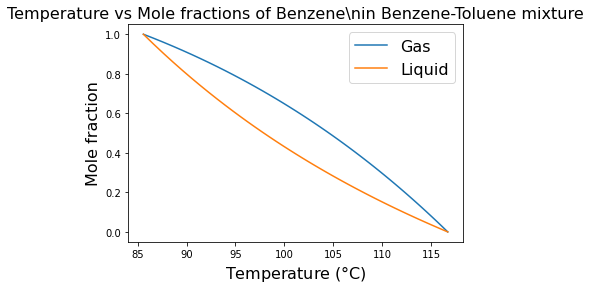

In [4]:
# redefine y_0 as a linespace
y_0 = np.linspace(0, 1, 50)

# initialize, solve for, and populate T and x_0 values
Tx = np.zeros((50,2))
T = np.zeros(50)
x_0 = np.zeros(50)
for i in range(len(Tx)):
    Tx[i] = fsolve(F, Tx_guess, args=(y_0[i]))
    T[i] = Tx[i][0]
    x_0[i] = Tx[i][1]
    
# plot resulting T against both x_0 values and y_0 values.
plt.plot(T, y_0)
plt.plot(T, x_0)
plt.title(r"Temperature vs Mole fractions of Benzene\nin Benzene-Toluene mixture", fontsize=16)
plt.ylabel("Mole fraction", fontsize=16)
plt.xlabel(r"Temperature ($\degree$C)", fontsize=16)
plt.legend(["Gas", "Liquid"], fontsize=16, loc="upper right");